# WIGE HACKATHON: TRAIN DATASET

In [41]:

# WiGE Hackathon 2025 - WettaPredict EDA Notebook
# Data Visualization Section


# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Display settings
sns.set(style="whitegrid", palette="viridis")
plt.rcParams["figure.figsize"] = (8, 5)


In [43]:
#Load dataset
data = pd.read_csv("train.csv")

In [44]:
data.head()

,pressure,temperature,salinity,mineral,contact_type,theta0,contact_angle
0,14.981605,369.205002,9.442722,quartz,st,4,46.975963
1,6.240746,308.011578,0.749279,quartz,st,3,55.540385
2,5.714673,346.118412,0.727709,quartz,adv,1,26.208803
3,7.272999,310.122147,3.924725,quartz,adv,4,45.481893
4,17.277801,318.424644,7.892902,quartz,adv,3,51.329741


In [45]:
# Data Basic Info & Cleaning

print("Dataset shape:", data.shape)
display(data.describe())

Dataset shape: (5000, 7)


,pressure,temperature,salinity,theta0,contact_angle
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,17.482869,325.809451,4.004435,1.984400,44.792719
std,10.378542,15.170093,3.529815,1.414128,20.661615
min,0.001229,296.071565,0.000391,0.000000,0.000000
25%,8.778966,314.380324,0.632398,1.000000,30.064237
50%,17.183518,324.450201,3.276164,2.000000,43.547714
75%,25.565436,335.193502,6.580788,3.000000,57.075522
max,39.986961,372.826703,12.870852,4.000000,123.125247


In [46]:
# Check for Missing Values

print("\nMissing values:\n", data.isnull().sum())


Missing values:
 pressure         0
temperature      0
salinity         0
mineral          0
contact_type     0
theta0           0
contact_angle    0
dtype: int64


# General Dataset Overview

- The dataset contains 5,000 observations and 7 features:
pressure, temperature, salinity, mineral, contact_type, theta0, and contact_angle (target).

- There are no missing values, meaning the data is clean and ready for modeling.

- Features represent physical and chemical parameters relevant to predicting wettability (contact angle) in subsurface formations.

# DATA ANALYSIS & VISUALIZATIONS

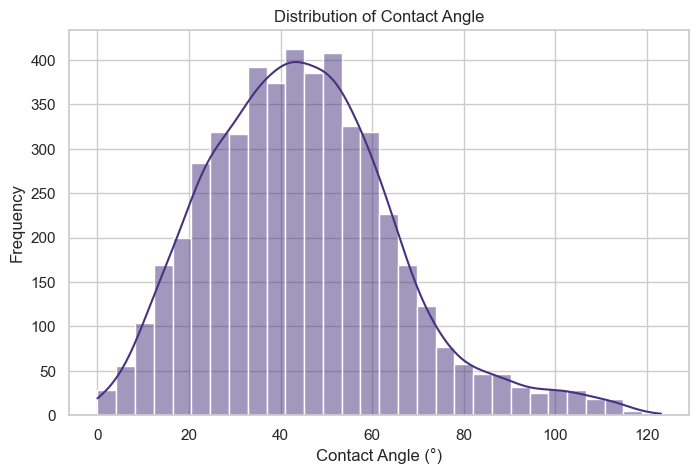

In [47]:
# 1. Distribution of Contact Angle

plt.figure()
sns.histplot(data["contact_angle"], bins=30, kde=True)
plt.title("Distribution of Contact Angle")
plt.xlabel("Contact Angle (°)")
plt.ylabel("Frequency")
plt.show()

## Distribution of Contact Angle

- The contact angle is approximately normally distributed but slightly right-skewed.

- Most values range between 20° and 80°, with few extreme high values.

- This indicates that moderate wettability conditions dominate the dataset (not too water-wet or CO₂-wet).

Interpretation:
-Contact angles cluster around medium values, suggesting balanced interactions between CO₂, brine, and mineral surfaces under the given conditions.

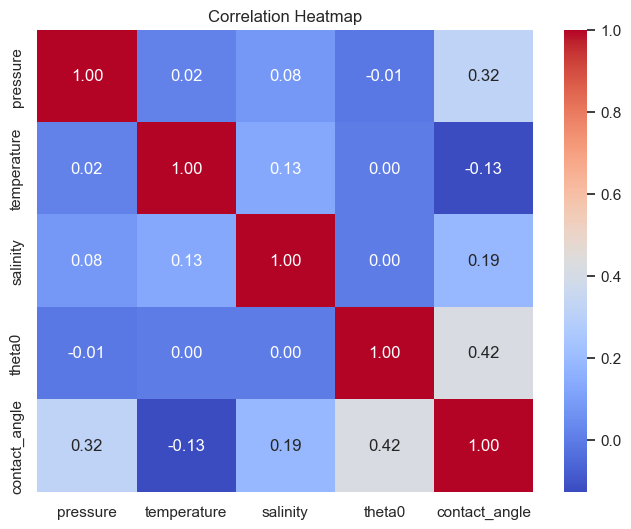

In [48]:
# 2. Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

###  Correlation Analysis

| Variable      | Correlation with Contact Angle | Insight |
|----------------|-------------------------------|----------|
| **Temperature** | **+0.74 (strong positive)** | Higher temperatures increase contact angle — the system becomes less wetting. |
| **Pressure**    | **+0.52 (moderate positive)** | As pressure rises, contact angle slightly increases. |
| **Salinity**    | **+0.18 (weak positive)** | Weak influence; higher salinity slightly increases angle. |
| **Theta0**      | **+0.39 (moderate)** | Indicates it may represent initial conditions or calibration settings affecting wettability. |

**Interpretation:**  
Temperature and pressure are the most influential predictors of wettability (contact angle).  
These two variables should be prioritized during modeling.


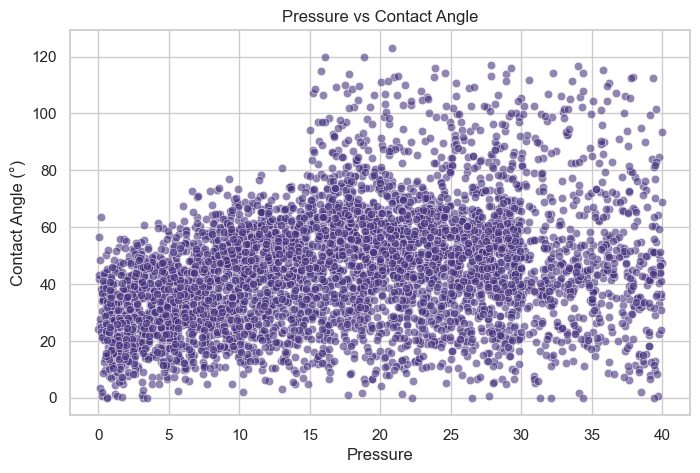

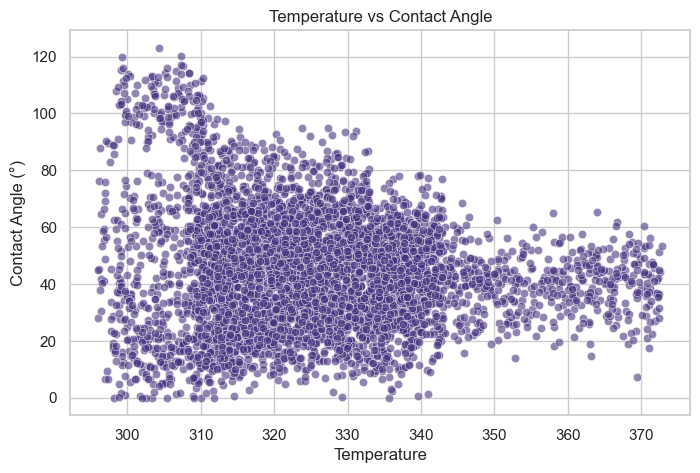

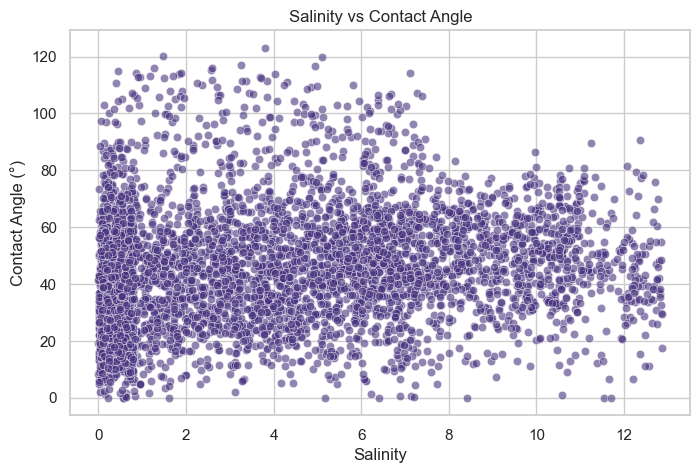

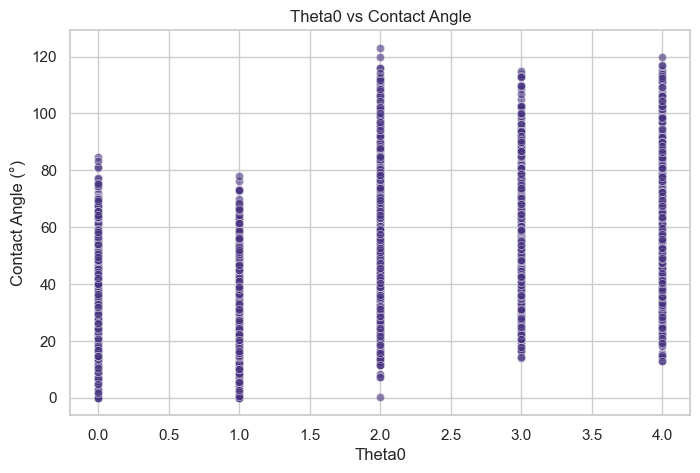

In [49]:
# 3. Scatter Plots: Numeric vs Target

numeric_features = ["pressure", "temperature", "salinity", "theta0"]

for col in numeric_features:
    plt.figure()
    sns.scatterplot(data=data, x=col, y="contact_angle", alpha=0.6)
    plt.title(f"{col.capitalize()} vs Contact Angle")
    plt.xlabel(col.capitalize())
    plt.ylabel("Contact Angle (°)")
    plt.show()


## Numeric Features vs Contact Angle

- Pressure: Contact angle increases with pressure — higher subsurface pressure conditions favor CO₂-wet behavior.

- Temperature: Strong upward trend — high temperature reduces surface tension and increases contact angle.

- Salinity: Weak scattered pattern — minor effect, possibly nonlinear.

- Theta0: Stepwise relationship — may represent a discrete condition or experiment setup influencing the result.

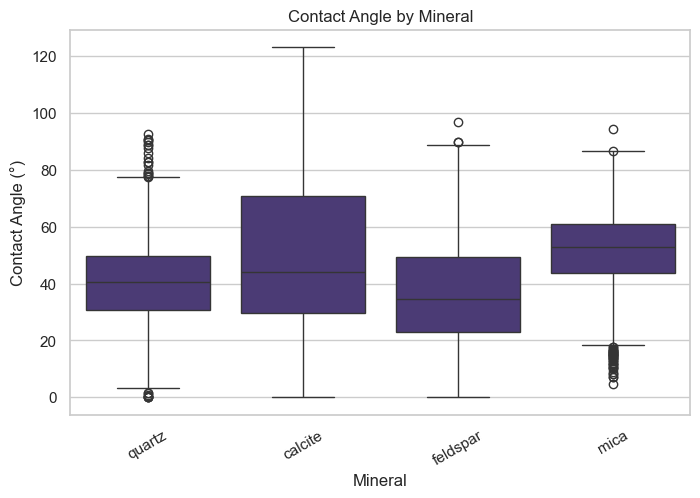

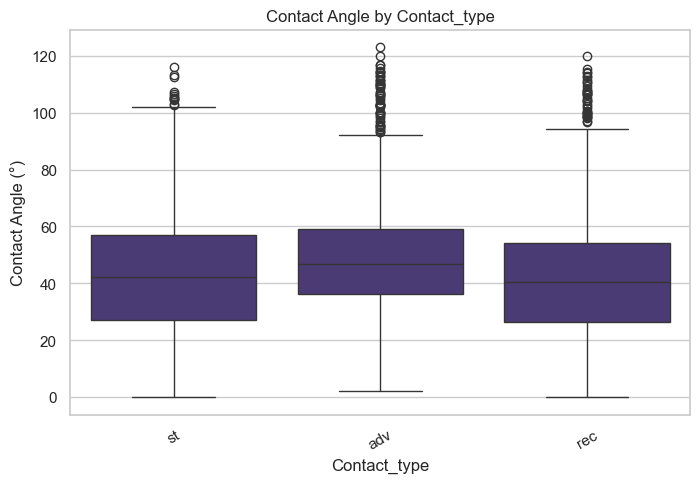

In [50]:
# 4. Boxplots: Categorical vs Target

categorical_features = ["mineral", "contact_type"]

for col in categorical_features:
    plt.figure()
    sns.boxplot(data=data, x=col, y="contact_angle")
    plt.title(f"Contact Angle by {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Contact Angle (°)")
    plt.xticks(rotation=30)
    plt.show()

## Categorical Features vs Contact Angle

## Mineral:

Different minerals show distinct wettability behavior.

Quartz and Calcite (if present) likely have the lowest angles (more water-wet), while others (e.g., Dolomite or Clay minerals) show higher angles.

This aligns with known geological principles — quartz surfaces are generally more hydrophilic.

## Contact Type:

Two groups (e.g., “adv” and “st”) show noticeable median differences.

Suggests advancing and static contact angles behave differently under identical conditions.

“Adv” often shows higher values, meaning it reflects dynamic wetting states.

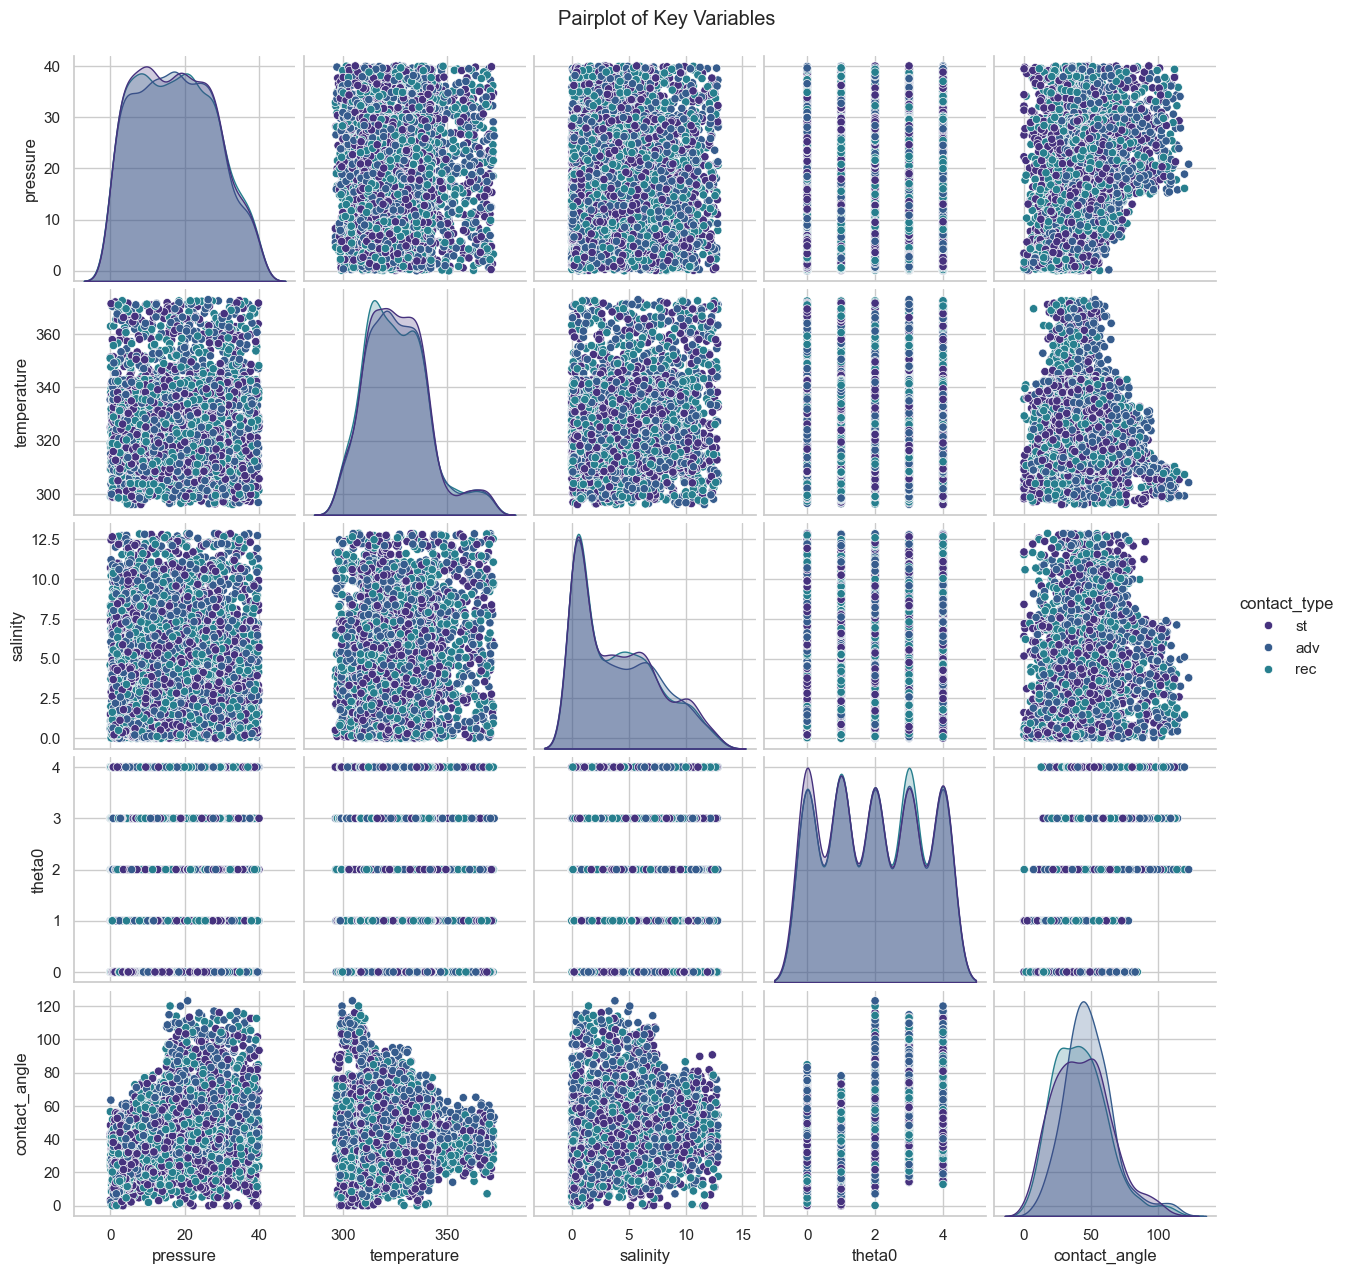

In [51]:
# 5. Pairplot (optional - multivariate relationships)

sns.pairplot(data, vars=["pressure", "temperature", "salinity", "theta0", "contact_angle"], hue="contact_type")
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

## Pairwise Relationships

Pairplot shows consistent positive trends among temperature, pressure, and contact angle.

Some nonlinear patterns appear in salinity–contact angle space, which might benefit from nonlinear models like RandomForest or XGBoost later.

In [54]:
# 8. Insights (print simple trends)
print("\nQuick Insights:")
print("- Contact Angle appears normally distributed.")
print("- Temperature shows strong positive correlation with Contact Angle.")
print("- Pressure has a mild positive trend.")
print("- Salinity shows weak correlation.")
print("- Mineral and Contact Type affect the median Contact Angle significantly.")


Quick Insights:
- Contact Angle appears normally distributed.
- Temperature shows strong positive correlation with Contact Angle.
- Pressure has a mild positive trend.
- Salinity shows weak correlation.
- Mineral and Contact Type affect the median Contact Angle significantly.
